In [20]:
library(dplyr)
library(ggplot2)

df <- read.csv(paste("C:/Users/saavedrak/Desktop/",
                     "USP_587_data/OHAS_v2/household.csv", sep=""))

In [21]:
print("Table 1. Summary Statistics of Selected Columns")

df %>%
    select(resty, income, hhveh, htrips) %>%
    summary()

[1] "Table 1. Summary Statistics of Selected Columns"


     resty           income          hhveh           htrips      
 Min.   :1.000   Min.   : 1.00   Min.   :0.000   Min.   : 0.000  
 1st Qu.:1.000   1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 4.000  
 Median :1.000   Median : 5.00   Median :2.000   Median : 8.000  
 Mean   :1.402   Mean   :11.32   Mean   :1.948   Mean   : 9.815  
 3rd Qu.:1.000   3rd Qu.: 7.00   3rd Qu.:2.000   3rd Qu.:14.000  
 Max.   :9.000   Max.   :99.00   Max.   :8.000   Max.   :81.000  

In [22]:
print("Table 2. Frequency of Income Groups")
inc.group <- group_by(df, income)  %>%
    filter(income != 99)
inc.group.summary <- summarize(inc.group, count=n())
inc.group.summary

[1] "Table 2. Frequency of Income Groups"


income,count
1,314
2,485
3,479
4,743
5,1321
6,1134
7,1013
8,530


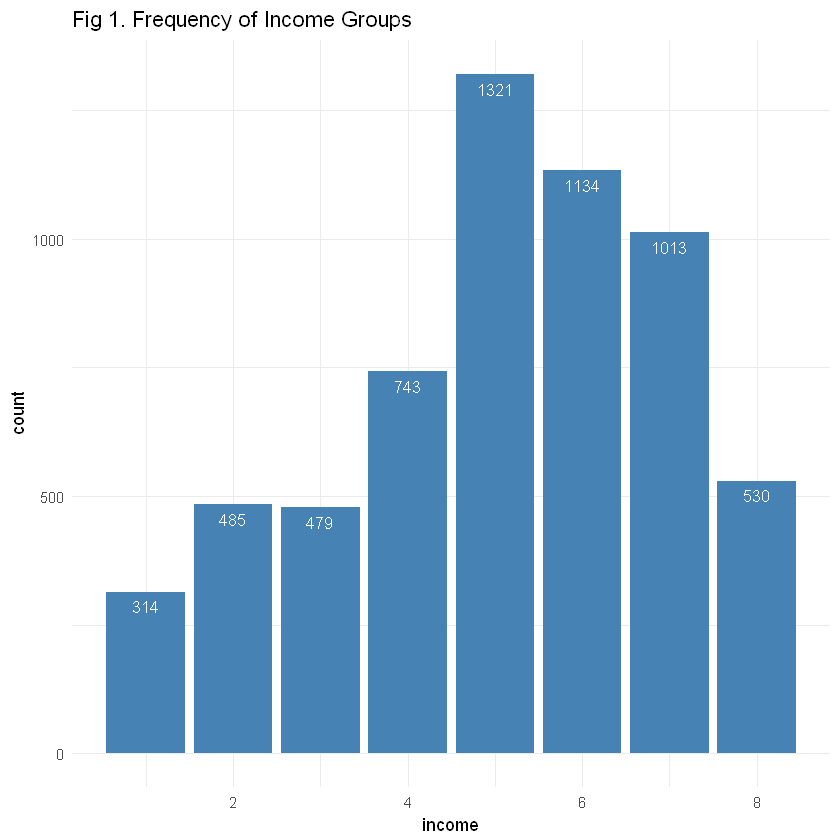

In [23]:
inc.group.summary %>% 
    ggplot(aes(x=income, y=count)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=count), vjust=1.6, color="white", size=3.5) +
    labs(title="Fig 1. Frequency of Income Groups") +
    theme_minimal()

In [27]:
print("Table 3. Frequency of Total Household Vehicles")
veh.group <- group_by(df, hhveh)
veh.group.summary <- summarize(veh.group, count=n())
veh.group.summary

[1] "Table 3. Frequency of Total Household Vehicles"


hhveh,count
0,347
1,1990
2,2554
3,1042
4,343
5,106
6,43
7,12
8,12


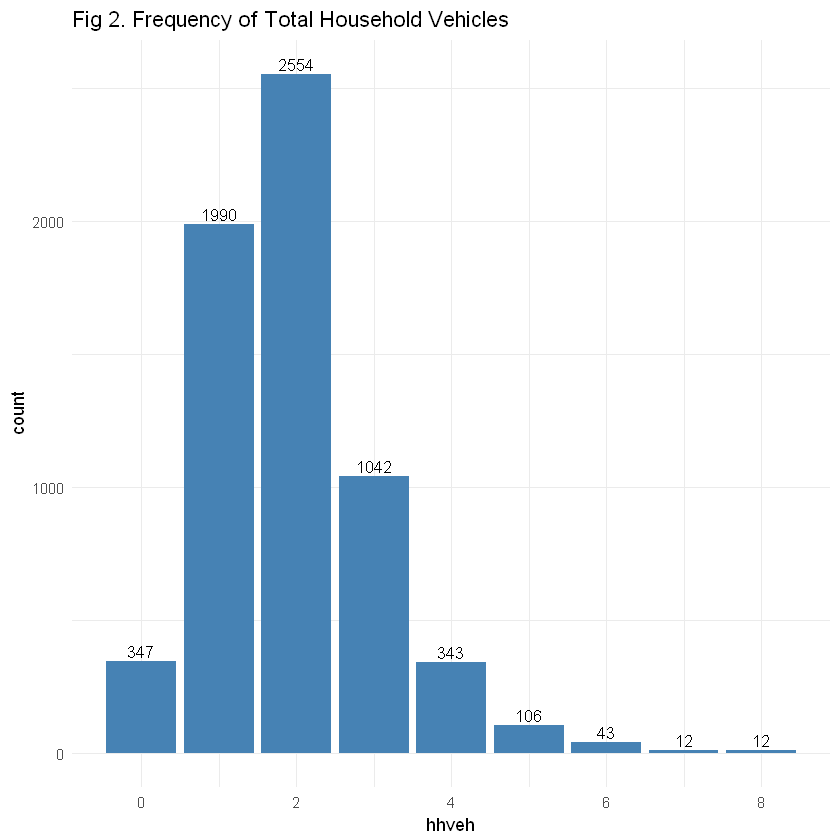

In [29]:
veh.group.summary %>% 
    ggplot(aes(x=hhveh, y=count)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=count), vjust=-0.3, color="black", size=3.5) +
    labs(title="Fig 2. Frequency of Total Household Vehicles") +
    theme_minimal()

In [30]:
print("Table 4. Household Trips by Total Household Vehicles")
veh.group <- group_by(df, hhveh)
veh.group.summary <- summarize(veh.group, count=n(), htrips_avg=mean(htrips))
veh.group.summary

[1] "Table 4. Household Trips by Total Household Vehicles"


hhveh,count,htrips_avg
0,347,7.925072
1,1990,6.988945
2,2554,11.066562
3,1042,11.666027
4,343,12.160350
5,106,12.377358
6,43,10.906977
7,12,13.416667
8,12,8.916667


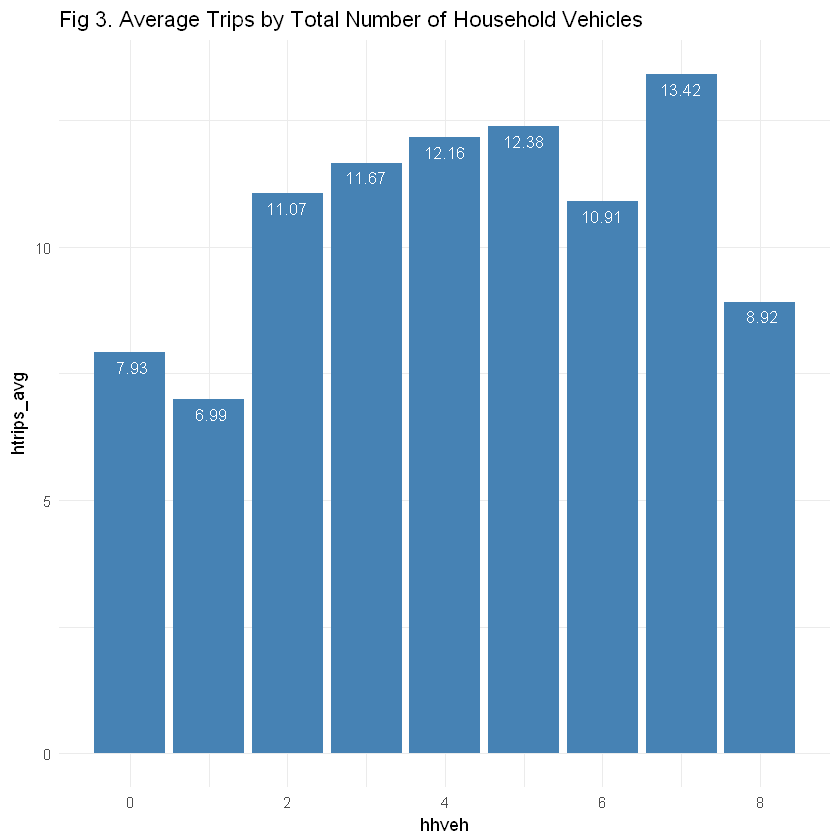

In [33]:
veh.group.summary %>% 
    ggplot(aes(x=hhveh, y=htrips_avg)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=format(htrips_avg, digits = 3)), 
                                vjust=1.6, color="white", size=3.5)+
    labs(title="Fig 3. Average Trips by Total Number of Household Vehicles") +
    theme_minimal()

In [34]:
print("Table 5. Household Trips by Income Group")
inc.group <- group_by(df, income)  %>%
    filter(income != 99)
inc.group.summary <- summarize(inc.group, count=n(), htrips_avg=mean(htrips))
inc.group.summary

[1] "Table 5. Household Trips by Income Group"


income,count,htrips_avg
1,314,6.359873
2,485,6.837113
3,479,6.828810
4,743,8.079408
5,1321,9.677517
6,1134,11.241623
7,1013,12.244817
8,530,12.622642


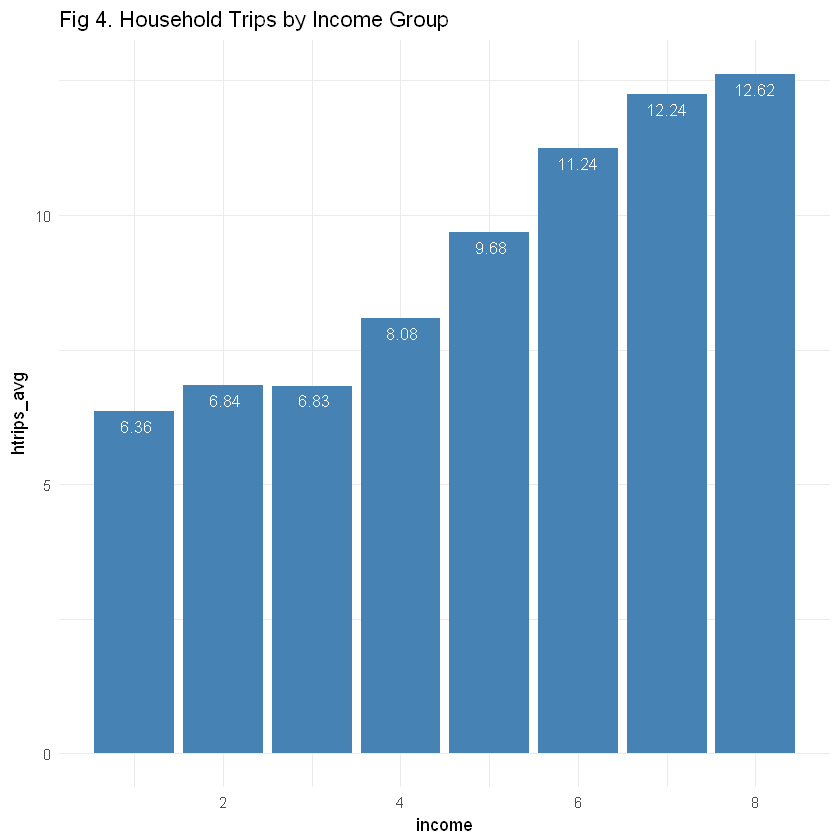

In [35]:
inc.group.summary %>% 
    ggplot(aes(x=income, y=htrips_avg)) + 
    geom_bar(stat="identity", fill="steelblue") +
    geom_text(aes(label=format(htrips_avg, digits = 3)), 
                                vjust=1.6, color="white", size=3.5)+
    labs(title="Fig 4. Household Trips by Income Group") +
    theme_minimal()

In [36]:
inc_cat <- ifelse(df$income <= 2 , 1, ifelse(
    df$income >= 3 & df$income <= 4, 2, ifelse(
        df$income >= 5 & df$income != 99, 3, ifelse(
            df$income == 99, NA, df$income))))

df$inc_cat <- inc_cat
print("Table 6. Frequency of Inc_cat")
inc_cat.group <- group_by(df, inc_cat)  %>%
    filter(complete.cases(inc_cat))
inc_cat.group.summary <- summarize(inc_cat.group, count=n())
inc_cat.group.summary

[1] "Table 6. Frequency of Inc_cat"


inc_cat,count
1,799
2,1222
3,3998


In [37]:
inc_cat.group <- group_by(df, inc_cat)  %>%
    filter(complete.cases(inc_cat))
inc_cat.group.summary <- summarize(inc_cat.group, htrips_avg=mean(htrips))
inc_cat.group.summary

inc_cat,htrips_avg
1,6.649562
2,7.589198
3,11.162081


In [38]:
incval <- ifelse(df$income == 1 , ((14999-0)/2 + 0), ifelse(
    df$income == 2, ((24999-15000)/2 + 15000), ifelse(
        df$income == 3, ((34999-25000)/2 + 25000), ifelse(
            df$income == 4, ((49999-35000)/2 + 35000), ifelse(
                df$income == 5, ((74999-50000)/2 + 50000), ifelse(
                    df$income == 6, ((99999-75000)/2 + 75000), ifelse(
                        df$income == 7, ((149999-100000)/2 + 100000), ifelse(
                            df$income == 8, 250000, ifelse(
                                df$income == 99, NA, df$income)))))))))
df$incval <- incval
print("Comparison of Income and INCVAL")
df %>%
    select(income, incval) %>%
    summary()
print("Standard Deviation of INCVAL:")
sd(df$incval, na.rm=TRUE)

[1] "Comparison of Income and INCVAL"


     income          incval      
 Min.   : 1.00   Min.   :  7500  
 1st Qu.: 4.00   1st Qu.: 42500  
 Median : 5.00   Median : 62500  
 Mean   :11.32   Mean   : 82890  
 3rd Qu.: 7.00   3rd Qu.:125000  
 Max.   :99.00   Max.   :250000  
                 NA's   :430     

[1] "Standard Deviation of INCVAL:"


[1] 62390.21

In [39]:
incval.group <- group_by(df, incval)  %>%
    filter(complete.cases(incval))
incval.group.summary <- summarize(incval.group, count=n(), 
                                  avg_htrips=mean(htrips))
incval.group.summary

incval,count,avg_htrips
7499.5,314,6.359873
19999.5,485,6.837113
29999.5,479,6.828810
42499.5,743,8.079408
62499.5,1321,9.677517
87499.5,1134,11.241623
124999.5,1013,12.244817
250000.0,530,12.622642


In [40]:
cor(df$incval, df$htrips, use="complete.obs")

[1] 0.2277575

In [79]:
linearMod <- lm(formula = incval ~ htrips, data=df)

modelSummary <- summary(linearMod)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
beta.estimate <- modelCoeffs["htrips", "Estimate"]  # get beta estimate for speed
std.error <- modelCoeffs["htrips", "Std. Error"]  # get std.error for speed
t_value <- beta.estimate/std.error  # calc t statistic
p_value <- 2*pt(-abs(t_value), df=nrow(df)-ncol(df))  # calc p Value
f_statistic <- linearMod$fstatistic[0]  # fstatistic
f <- summary(linearMod)$fstatistic  # parameters for model p-value calc
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

print(modelSummary)
print(model_p)


Call:
lm(formula = incval ~ htrips, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-163864  -40374  -13365   18957  185118 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64881.8     1264.2   51.32   <2e-16 ***
htrips        1830.5      100.9   18.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60760 on 6017 degrees of freedom
  (430 observations deleted due to missingness)
Multiple R-squared:  0.05187,	Adjusted R-squared:  0.05172 
F-statistic: 329.2 on 1 and 6017 DF,  p-value: < 2.2e-16

       value 
1.136773e-71 


Warning message:
"Removed 430 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 430 rows containing missing values (geom_point)."

NULL

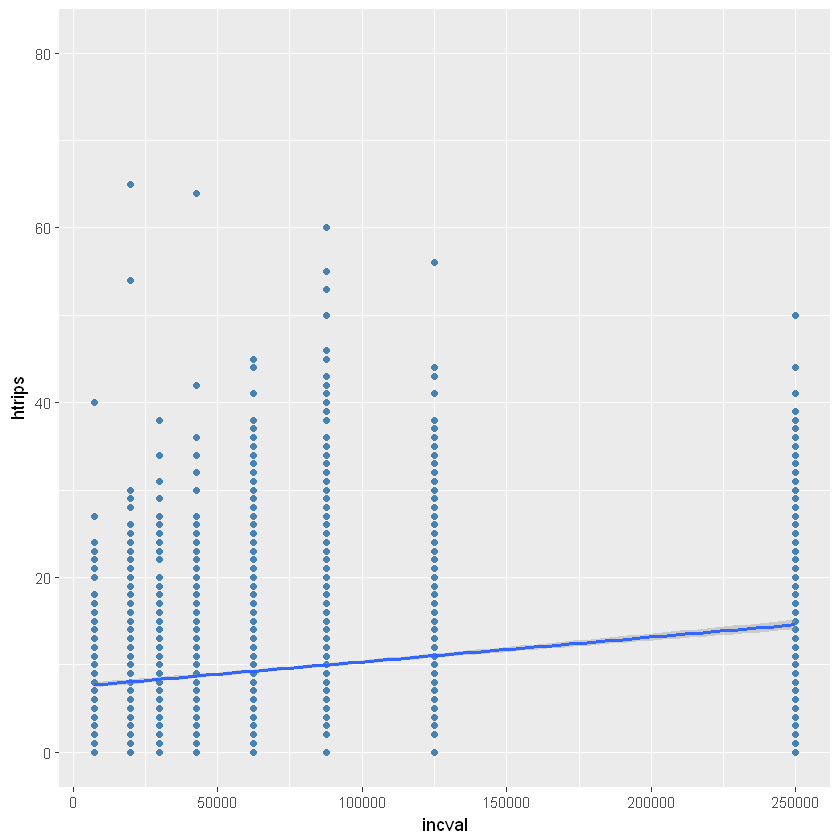

In [86]:
df %>% 
    ggplot(aes(x=incval, y=htrips)) + 
    geom_point(stat="identity", color="steelblue") +
    geom_smooth(method=lm)
    labs(title="Fig 4. Household Trips by INCVAL") +
    theme_minimal()